# 파이썬 프로그래밍 실기 평가

In [1]:
# 1

for n in range(1, 5):
    print(' '*(5-n) + '*'*(2*n-1),'  '*(5-n) + '*'*(2*n-1))

    *         *
   ***       ***
  *****     *****
 *******   *******


In [2]:
# 2

import random
n = int(input("정수  n = "))

def create_mine(n):
    if n < 3:
        print('3 이상의 정수를 다시 입력하세요')
    else:
        a = [[random.choice(['.','*']) for x in range(n)] for y in range(n)]
        for y in a:
            print(''.join(y))
        r = a.copy()
        for y, yd in enumerate(r):
            for x, xd in enumerate(yd):
                if r[y][x] == '*': continue
                count = 0
                c = [[''] if y - 1 < 0 else r[y-1][0 if x - 1 < 0 else x - 1:x+2],
                     r[y][0 if x - 1 < 0 else x - 1:x+2],             
                     [''] if y + 1 >= n else r[y+1][0 if x - 1 < 0 else x - 1:x+2]]
                for z in c:
                    count+=z.count('*')
                r[y][x] = str(count)
                
    print("인접한 지뢰의 개수")
    for y in r:
        print(''.join(y)) 

print(create_mine(n))

정수  n = 3
.**
***
**.
인접한 지뢰의 개수
3**
***
**3
None


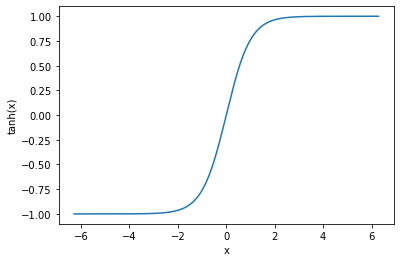

In [3]:
# 3

import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
plt.plot(x, np.tanh(x))
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.axis('tight')
plt.show()

In [4]:
# 4

import requests
from bs4 import BeautifulSoup
 
if __name__ == "__main__":
    RANK = 100 
 
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
    req = requests.get('https://www.melon.com/chart/month/index.htm?classCd=DM0000#params%5Bidx%5D=1&params%5BrankMonth%5D=202005&params%5BisFirstDate%5D=false&params%5BisLastDate%5D=true', headers = header) ## 주간 차트를 크롤링 할 것임
    html = req.text
    parse = BeautifulSoup(html, 'html.parser')
 
    titles = parse.find_all("div", {"class": "ellipsis rank01"}) 
    singers = parse.find_all("div", {"class": "ellipsis rank02"}) 
    albums = parse.find_all("div",{"class": "ellipsis rank03"})
 
    title = []
    singer = []
    album = []
    rank = []
 
    for t in titles:
        title.append(t.find('a').text)
 
    for s in singers:
        singer.append(s.find('span', {"class": "checkEllipsis"}).text)

    for a in albums:
        album.append(a.find('a').text)
 
    for i in range(1,101):
        rank.append(i)

In [5]:
import pandas as pd
df = pd.DataFrame({'제목':title,'가수':singer,'앨범명':album,'순위':rank})
df

,제목,가수,앨범명,순위
0,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇,1
1,아로하,조정석,슬기로운 의사생활 OST Part 3,2
2,살짝 설렜어 (Nonstop),오마이걸,NONSTOP,3
3,나비와 고양이 (feat.백현 (BAEKHYUN)),볼빨간사춘기,사춘기집Ⅱ 꽃 본 나비,4
4,시작,가호 (Gaho),이태원 클라쓰 OST Part.2,5
...,...,...,...,...
95,비,폴킴,비,96
96,Sweet Night,V,이태원 클라쓰 OST Part.12,97
97,문득,노을,문득,98
98,나의 오랜 연인에게,다비치,나의 오랜 연인에게,99


In [6]:
df1 = df.set_index("순위")
df1

,제목,가수,앨범명
순위,,,
1,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇
2,아로하,조정석,슬기로운 의사생활 OST Part 3
3,살짝 설렜어 (Nonstop),오마이걸,NONSTOP
4,나비와 고양이 (feat.백현 (BAEKHYUN)),볼빨간사춘기,사춘기집Ⅱ 꽃 본 나비
5,시작,가호 (Gaho),이태원 클라쓰 OST Part.2
...,...,...,...
96,비,폴킴,비
97,Sweet Night,V,이태원 클라쓰 OST Part.12
98,문득,노을,문득


In [7]:
df1.head(10)

,제목,가수,앨범명
순위,,,
1,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇
2,아로하,조정석,슬기로운 의사생활 OST Part 3
3,살짝 설렜어 (Nonstop),오마이걸,NONSTOP
4,나비와 고양이 (feat.백현 (BAEKHYUN)),볼빨간사춘기,사춘기집Ⅱ 꽃 본 나비
5,시작,가호 (Gaho),이태원 클라쓰 OST Part.2
6,처음처럼,엠씨더맥스 (M.C the MAX),CEREMONIA
7,덤더럼(Dumhdurum),Apink (에이핑크),LOOK
8,좋은 사람 있으면 소개시켜줘,조이 (JOY),슬기로운 의사생활 OST Part 2
9,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,멜로가 체질 OST Part 3


In [11]:
# 4 전월순위추가

import requests
from bs4 import BeautifulSoup
 
if __name__ == "__main__":
    RANK = 100 
 
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
    req = requests.get('https://www.melon.com/chart/month/index.htm?classCd=DM0000#params%5Bidx%5D=1&params%5BrankMonth%5D=202005&params%5BisFirstDate%5D=false&params%5BisLastDate%5D=true', headers = header) ## 주간 차트를 크롤링 할 것임
    html = req.text
    parse = BeautifulSoup(html, 'html.parser')
 
    titles = parse.find_all("div", {"class": "ellipsis rank01"}) 
    singers = parse.find_all("div", {"class": "ellipsis rank02"}) 
    albums = parse.find_all("div",{"class": "ellipsis rank03"})
    before = parse.find_all('div', {'class':'wrap'})
    before1 = before.find('span', {"class": "none"}).text
 
    title = []
    singer = []
    album = []
    rank = []
    before2 = []
 
    for t in titles:
        title.append(t.find('a').text)
 
    for s in singers:
        singer.append(s.find('span', {"class": "checkEllipsis"}).text)

    for a in albums:
        album.append(a.find('a').text)
 
    for i in range(1,101):
        rank.append(i)
        
    for j in before1:
        if '진입' in before1:
            before2.append('-1')
        if '동일' in before1:
            before2.append(i)
        if '상승' in before1:
            before2.append(i + int(text))
        if '하락' in before1:
            before2.append(i - int(text))

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?